In [1]:
%env KERAS_BACKEND=tensorflow
import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

In [4]:
print('訓練總筆數',len(x_train))
print('測試總筆數',len(x_test))

訓練總筆數 25000
測試總筆數 25000


In [5]:
y_train[:10]

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [6]:
from keras.preprocessing import sequence

In [7]:
x_train = sequence.pad_sequences(x_train, maxlen=150)
x_test = sequence.pad_sequences(x_test, maxlen=150)

In [8]:
x_train.shape

(25000, 150)

In [9]:
N = 3 #文字要壓到N維
K = 4 #LSTM有K個神經元

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [11]:
model = Sequential()

model.add(Embedding(10000,N))
model.add(LSTM(K))

model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [12]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 3)           30000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 30,133
Trainable params: 30,133
Non-trainable params: 0
_________________________________________________________________


In [14]:
model_fit_his = model.fit(x_train,y_train, batch_size=32, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
25000/25000 [==============================] - 86s 3ms/step - loss: 0.5245 - acc: 0.7433
Epoch 2/5
25000/25000 [==============================] - 87s 3ms/step - loss: 0.3094 - acc: 0.8811
Epoch 3/5
25000/25000 [==============================] - 87s 3ms/step - loss: 0.2324 - acc: 0.9141
Epoch 4/5
25000/25000 [==============================] - 86s 3ms/step - loss: 0.1903 - acc: 0.9338
Epoch 5/5
25000/25000 [==============================] - 87s 3ms/step - loss: 0.1635 - acc: 0.9442


In [15]:
score = model.evaluate(x_train, y_train)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score[1]*100.0))

25000/25000 [==============================] - 13s 510us/step

	 Accuracy of testing data = 96.3%


In [16]:
N1 = 50 #文字要壓到50維
K1 = 50 #LSTM有50個神經元

model_1 = Sequential()

model_1.add(Embedding(10000,N1))
model_1.add(LSTM(K1))

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 520,251
Trainable params: 520,251
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_1_fit_his = model_1.fit(x_train,y_train, batch_size=32, epochs=5)

Epoch 1/5
25000/25000 [==============================] - 103s 4ms/step - loss: 0.4013 - acc: 0.8158
Epoch 2/5
25000/25000 [==============================] - 104s 4ms/step - loss: 0.2466 - acc: 0.9030
Epoch 3/5
25000/25000 [==============================] - 105s 4ms/step - loss: 0.1872 - acc: 0.9282
Epoch 4/5
25000/25000 [==============================] - 106s 4ms/step - loss: 0.1476 - acc: 0.9468
Epoch 5/5
25000/25000 [==============================] - 105s 4ms/step - loss: 0.1202 - acc: 0.9558


In [19]:
score_1 = model_1.evaluate(x_train, y_train)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score_1[1]*100.0))

25000/25000 [==============================] - 15s 589us/step

	 Accuracy of testing data = 95.5%


In [20]:
N2 = 50 #文字要壓到50維
K2 = 8 #LSTM有8個神經元

model_2 = Sequential()

model_2.add(Embedding(10000,N2))
model_2.add(LSTM(K2))

model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 50)          500000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 1888      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 501,897
Trainable params: 501,897
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_2_fit_his = model_2.fit(x_train,y_train, batch_size=32, epochs=5)

Epoch 1/5
25000/25000 [==============================] - 101s 4ms/step - loss: 0.4659 - acc: 0.7880
Epoch 2/5
25000/25000 [==============================] - 99s 4ms/step - loss: 0.2802 - acc: 0.8908
Epoch 3/5
25000/25000 [==============================] - 101s 4ms/step - loss: 0.2007 - acc: 0.9267
Epoch 4/5
25000/25000 [==============================] - 100s 4ms/step - loss: 0.1522 - acc: 0.9454
Epoch 5/5
25000/25000 [==============================] - 98s 4ms/step - loss: 0.1214 - acc: 0.9596


In [23]:
score_2 = model_2.evaluate(x_train, y_train)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score_2[1]*100.0))

25000/25000 [==============================] - 14s 560us/step

	 Accuracy of testing data = 96.8%


In [24]:
N3 = 8 #文字要壓到8維
K3 = 50 #LSTM有50個神經元

model_3 = Sequential()

model_3.add(Embedding(10000,N3))
model_3.add(LSTM(K3))

model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [25]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 8)           80000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                11800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 91,851
Trainable params: 91,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_3_fit_his = model_3.fit(x_train,y_train, batch_size=32, epochs=5);

Epoch 1/5
25000/25000 [==============================] - 101s 4ms/step - loss: 0.4451 - acc: 0.7734
Epoch 2/5
25000/25000 [==============================] - 99s 4ms/step - loss: 0.2576 - acc: 0.8978
Epoch 3/5
25000/25000 [==============================] - 98s 4ms/step - loss: 0.2038 - acc: 0.9242
Epoch 4/5
25000/25000 [==============================] - 100s 4ms/step - loss: 0.1675 - acc: 0.9380
Epoch 5/5
25000/25000 [==============================] - 100s 4ms/step - loss: 0.1395 - acc: 0.9499


In [27]:
score_3 = model_3.evaluate(x_train, y_train)
print()
print("\t Accuracy of testing data = {:2.1f}%".format(score_3[1]*100.0))

25000/25000 [==============================] - 15s 581us/step

	 Accuracy of testing data = 96.8%


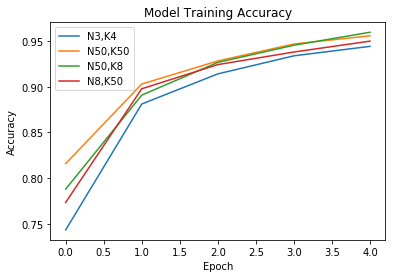

In [28]:
plt.plot(model_fit_his.history["acc"])
plt.plot(model_1_fit_his.history["acc"])
plt.plot(model_2_fit_his.history["acc"])
plt.plot(model_3_fit_his.history["acc"])

plt.title("Model Training Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["N3,K4","N50,K50","N50,K8","N8,K50"], loc="best")
plt.show()